In [1]:
import gym
import ray
from ray.rllib.agents.ppo import PPOTrainer
from scouting_gym.scouting_env_real import ScoutingEnvInference
from gym.envs.registration import register
from IPython.display import clear_output

register(
    id='Scouting-inference-v0',
    entry_point='scouting_gym.scouting_env_real:ScoutingEnvInference'
)

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
env = gym.make('Scouting-inference-v0')

print(env.observation_space)

Box(0.0, 8.0, (12,), float32)


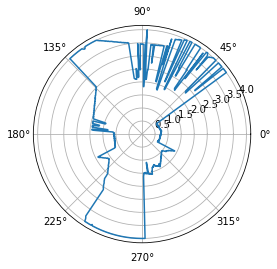

array([1.66774619, 1.47577536, 1.09983253, 0.99584836, 0.66189927,
       0.67989647, 0.66989797, 1.7857281 , 1.81572354, 2.33364463,
       0.50298275, 3.00239159])

[WARN] [1611759627.820297]: Inbound TCP/IP connection failed: connection from sender terminated before handshake header received. 0 bytes were received. Please check sender for additional details.


In [6]:
env.reset()

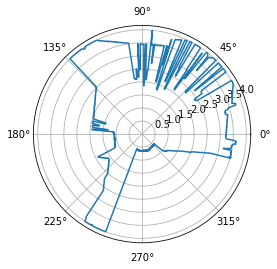

array([1.67374504, 0.60590774, 0.60390806, 0.5859108 , 1.40978539,
       3.2215097 , 2.09768057, 1.7857281 , 1.85171807, 2.33164477,
       0.5       , 3.        ])

In [4]:
env.reset()

In [15]:
env.reset()
for _ in range(80):
    #obs, reward, done, _ = env.step(1)
    obs, reward, done, _ = env.step([0.0, ])

    clear_output(wait=True)
    print(obs[-2:])
    if done:
        print('break')
        break
print(obs)
print(obs.min())
print(obs.max())
env.reset()

In [8]:
print(obs)

[1.26780689 2.34964228 2.39163566 2.14567327 2.0936811  1.87971377
 1.61775362 1.44178045 1.10183215 1.11383045 0.45967214 2.60019973]


In [4]:
ray.init()

2021-01-27 15:17:34,773	INFO services.py:1171 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '192.168.178.21',
 'raylet_ip_address': '192.168.178.21',
 'redis_address': '192.168.178.21:6379',
 'object_store_address': '/tmp/ray/session_2021-01-27_15-17-34_048434_21802/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-01-27_15-17-34_048434_21802/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2021-01-27_15-17-34_048434_21802',
 'metrics_export_port': 61104,
 'node_id': '486924bdfe4a733f454cad97f2e4988c7fddda64'}

In [5]:
config = {
    "env": ScoutingEnvInference,  # or "corridor" if registered above
    "env_config": {
        "corridor_length": 5,
    },
    # Use GPUs iff `RLLIB_NUM_GPUS` env var set to > 0.

    "num_gpus": 1,
    "num_workers": 1,  # parallelism
    "model": {
        "fcnet_hiddens": [256, ],
        #"fcnet_hiddens": tune.grid_search([[64, 64, ], [128, 128, ], [256, 256, ]])
    }
}

In [6]:
def load(checkpoint_path, config):
    """
    Load a trained RLlib agent from the specified path. Call this before testing a trained agent.
    :param path: Path pointing to the agent's saved checkpoint (only used for RLlib agents)
    """
    agent = PPOTrainer(config=config)
    agent.restore(checkpoint_path)
    return agent

def test(agent, env):
    """Test trained agent for a single episode. Return the episode reward"""
    # instantiate env class

    # run until episode ends
    episode_reward = 0
    done = False
    obs = env.reset()
    while not done:
        action = agent.compute_action(obs)
        obs, reward, done, info = env.step(action)
        clear_output(wait=True)
        print(obs[-2:])
        episode_reward += reward
    env.reset()
    return episode_reward

In [7]:
checkpoint_path = '/home/dschori/Downloads/checkpoint_50/checkpoint-50'

In [10]:
agent = load(checkpoint_path=checkpoint_path, config=config)

episode_reward = test(agent=agent, env=env)
episode_reward

[2.37531571 1.96236952]
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-bf5c9a0ae309>", line 3, in <module>
    episode_reward = test(agent=agent, env=env)
  File "<ipython-input-6-cf8a824ff1e2>", line 20, in test
    obs, reward, done, info = env.step(action)
  File "/home/dschori/PycharmProjects/MasterThesis/ackerbot_sim_ws/src/rl-scouting/scouting_gym/src/scouting_gym/scouting_env_real.py", line 125, in step
    self.rate.sleep()
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/timer.py", line 103, in sleep
    sleep(self._remaining(curr_time))
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/timer.py", line 134, in sleep
    rospy.rostime.wallsleep(duration)
  File "/opt/ros/noetic/lib/python3/dist-packages/rospy/rostime.py", line 277, in wallsleep
    time.sleep(duration)
KeyboardInterrupt

During 

TypeError: object of type 'NoneType' has no len()

In [11]:
env.reset()



array([1.60175598, 0.90986145, 0.71789074, 0.66389889, 0.64990103,
       0.92785871, 1.41178513, 2.09168148, 0.99184895, 1.19181848,
       0.5       , 3.        ])